Install Ultralytics

In [ ]:
%pip install ultralytics

Import yolov8 model

In [ ]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()


Import Roboflow data set directly from roboflow

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="A9pTxtiRuctdHhmQ517y")
project = rf.workspace("hihello").project("animal_vid")
version = project.version(5)
dataset = version.download("yolov8")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.1/74.1 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.0 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.7
    Uninstalling idna-3.7:
      Successfully uninstalled idna-3.7
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.

loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.196`, to intall it `pip install ultralytics==8.0.196`.



Extracting Dataset Version Zip to ANIMAL_VID-5 in yolov8:: 100%|██████████| 470/470 [00:00<00:00, 6723.70it/s]


Changing the directory


In [ ]:
%cd ANIMAL_VID-5

Train the custom dataset using 10 epochs

In [ ]:
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=10 imgsz=640

100% 49.7M/49.7M [00:00<00:00, 208MB/s]
Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/ANIMAL_VID-5/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=Fa

confusion matrix of 10 epochs

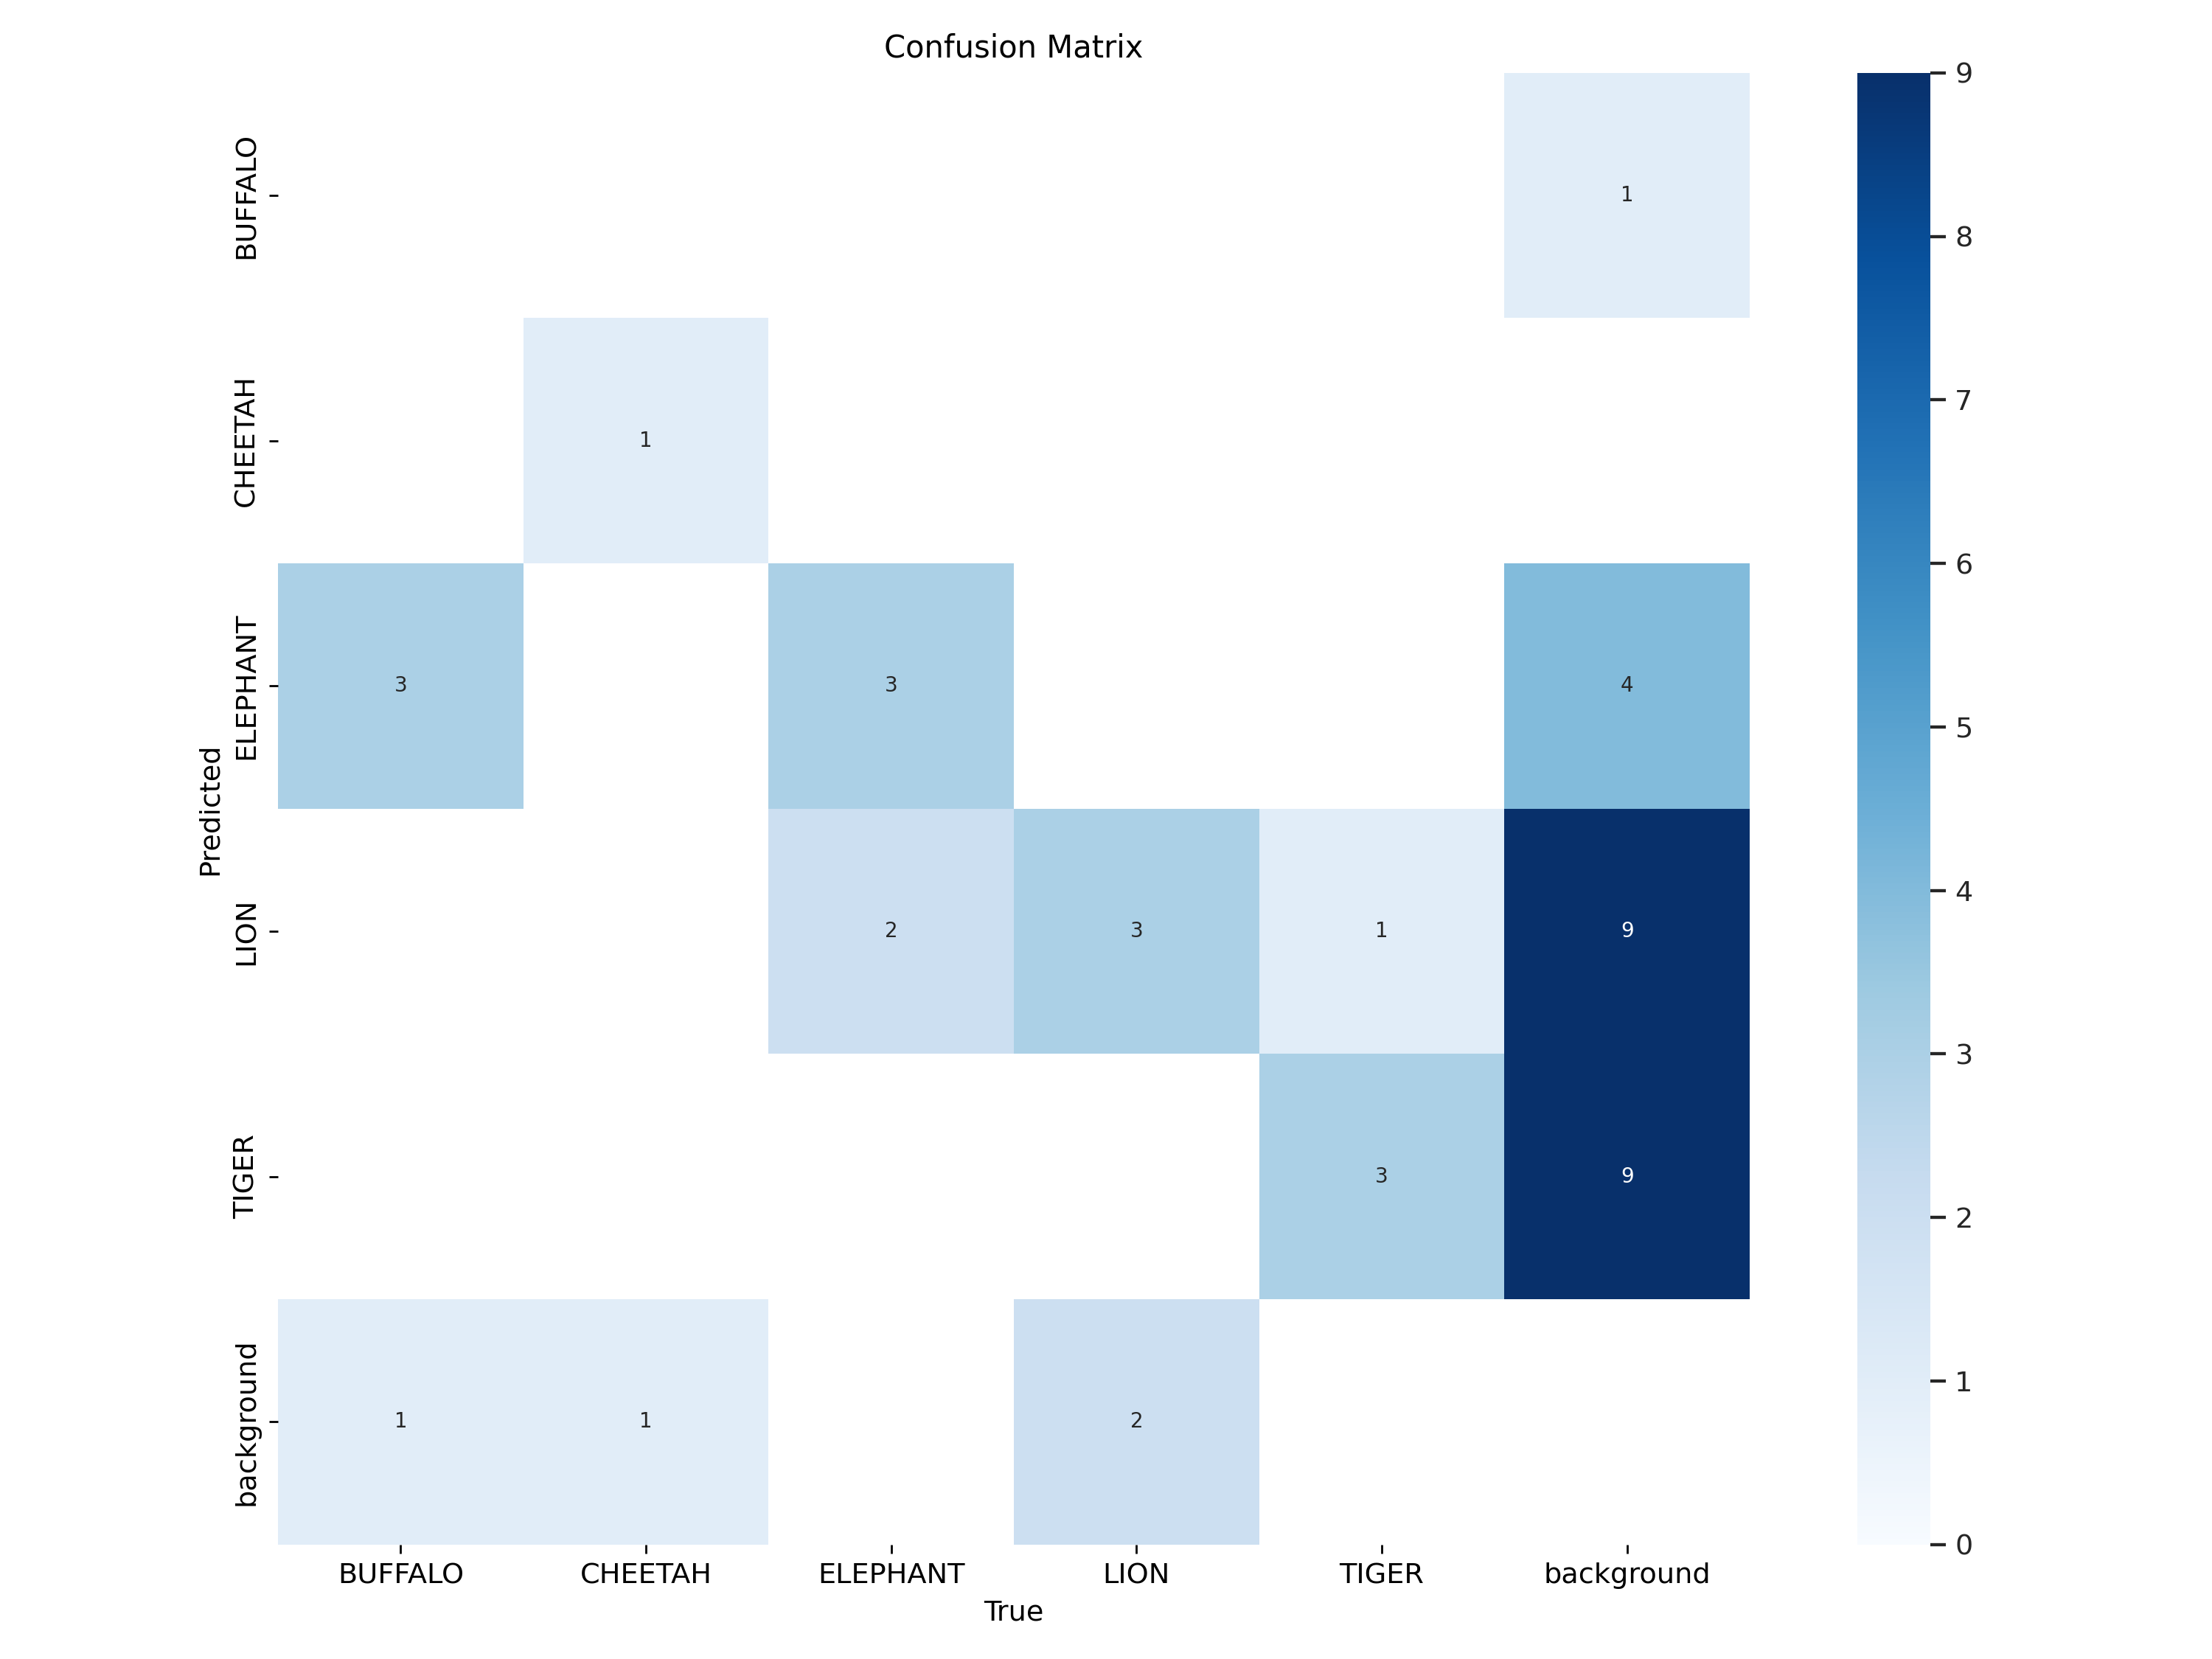

In [ ]:
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

loos value & mAP values

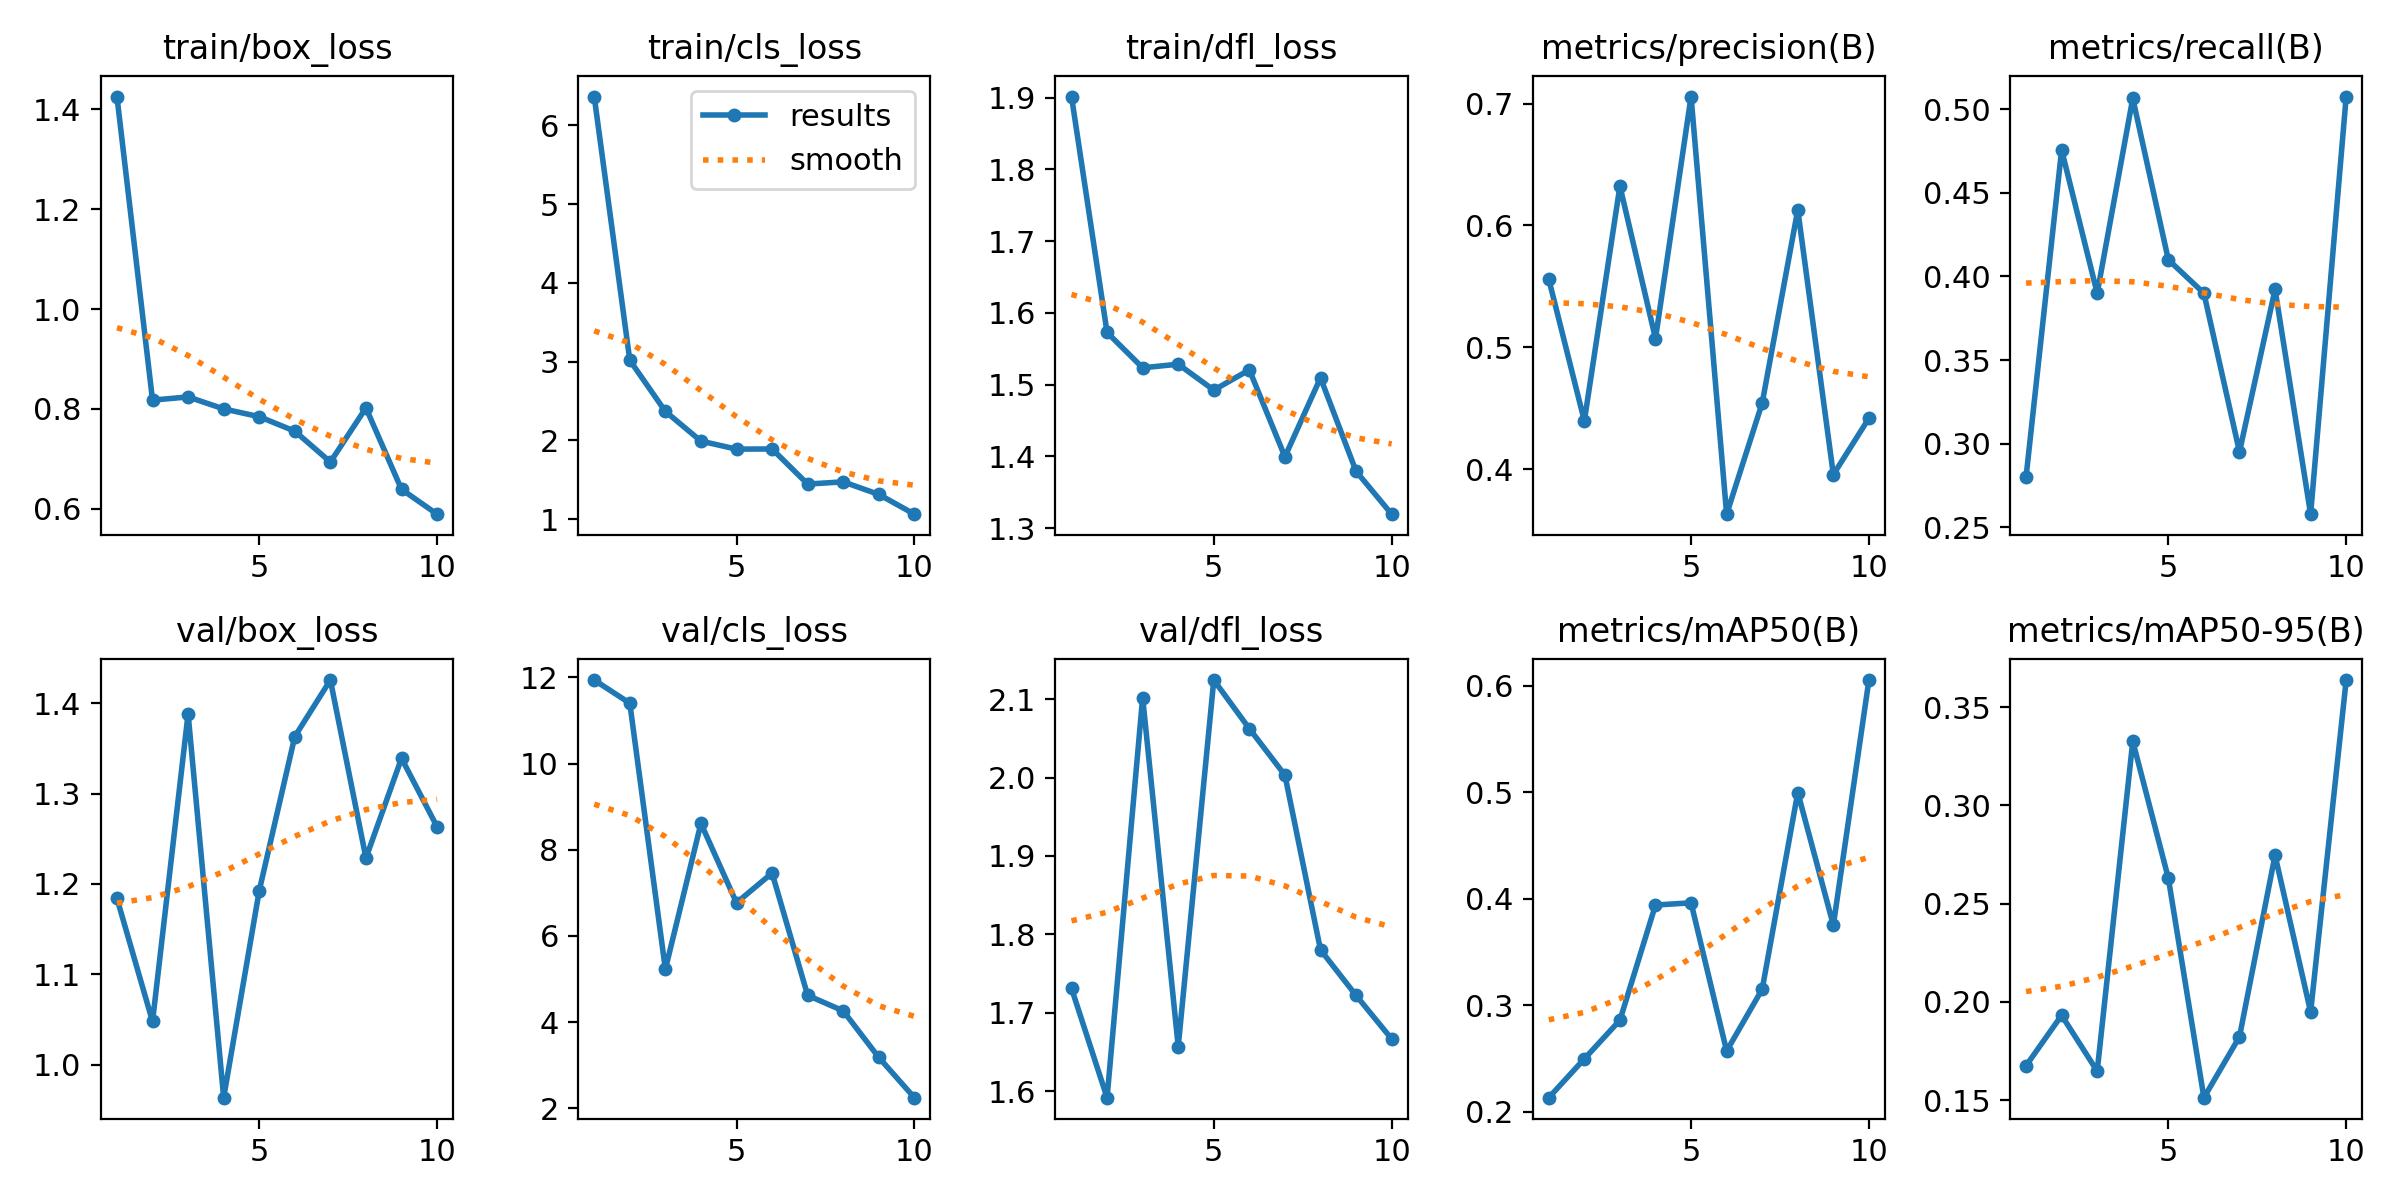

In [ ]:
Image(filename=f'/content/runs/detect/train/results.png', width=600)

Train the custom dataset using 30 epochs

In [ ]:
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=30 imgsz=640

Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/ANIMAL_VID-5/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, 

Confusion matrix of 30 epochs training

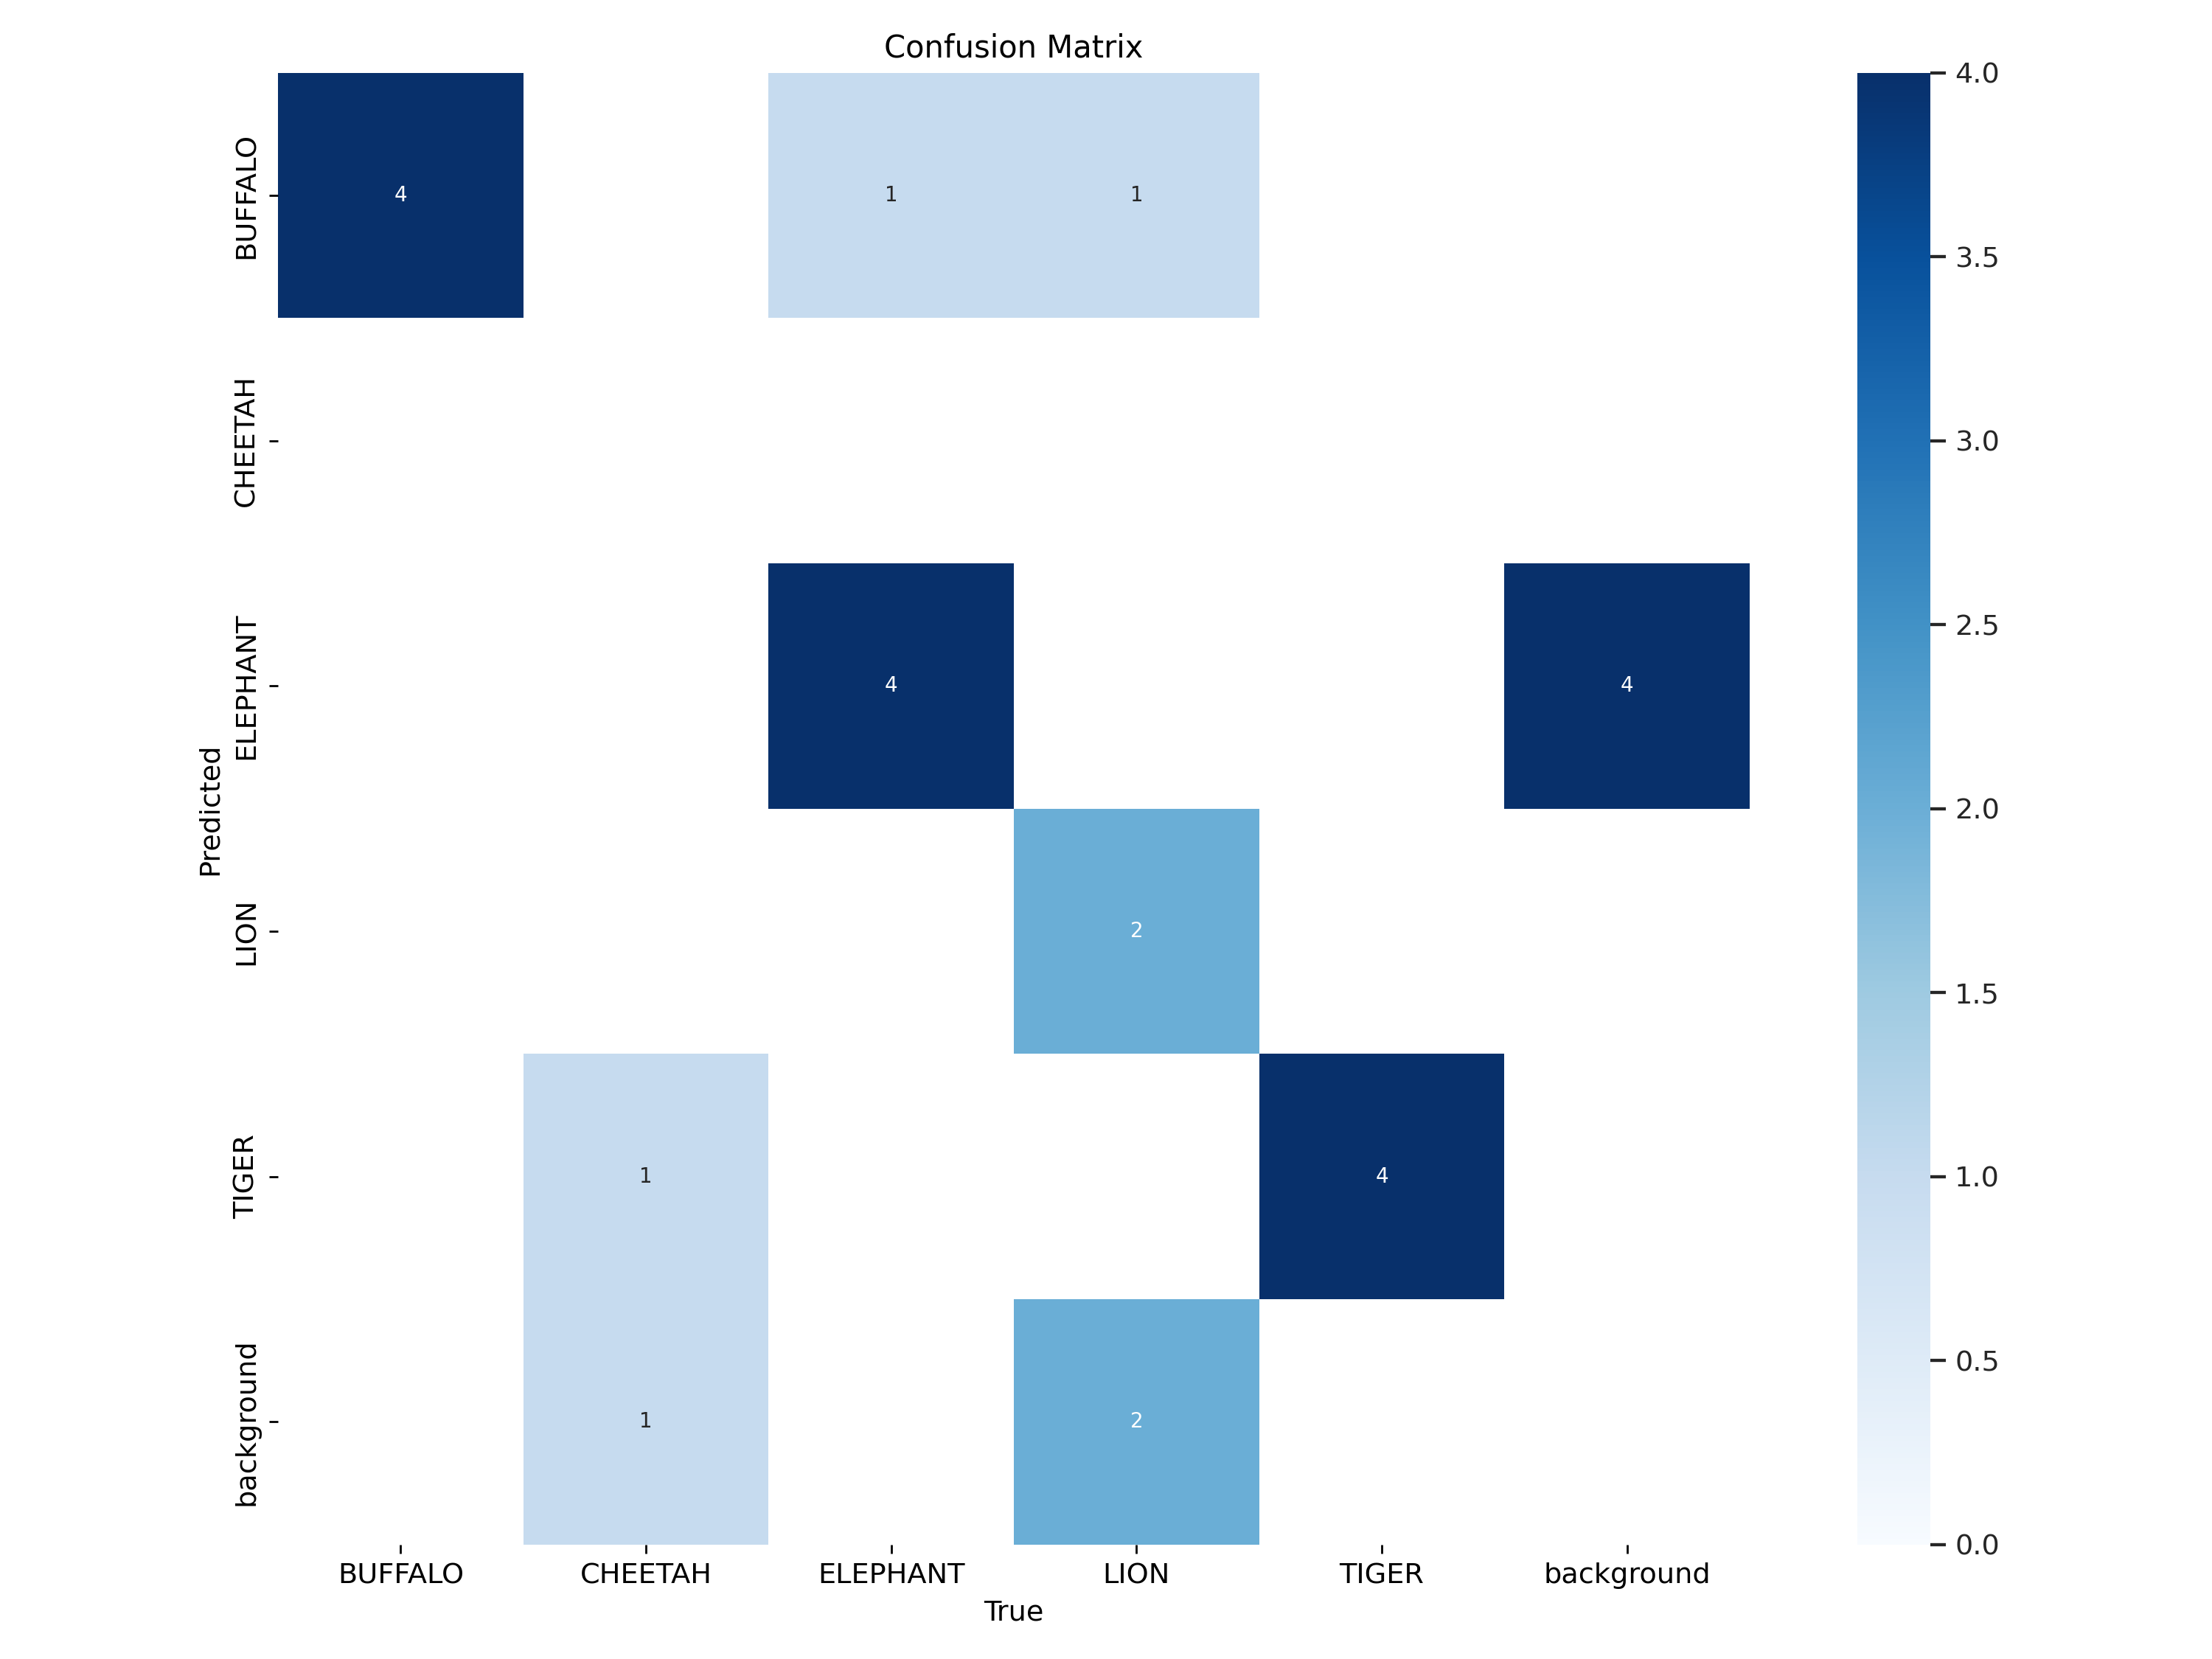

In [ ]:
Image(filename=f'/content/runs/detect/train2/confusion_matrix.png', width=600)

loss curva & Map cure 30 epochs

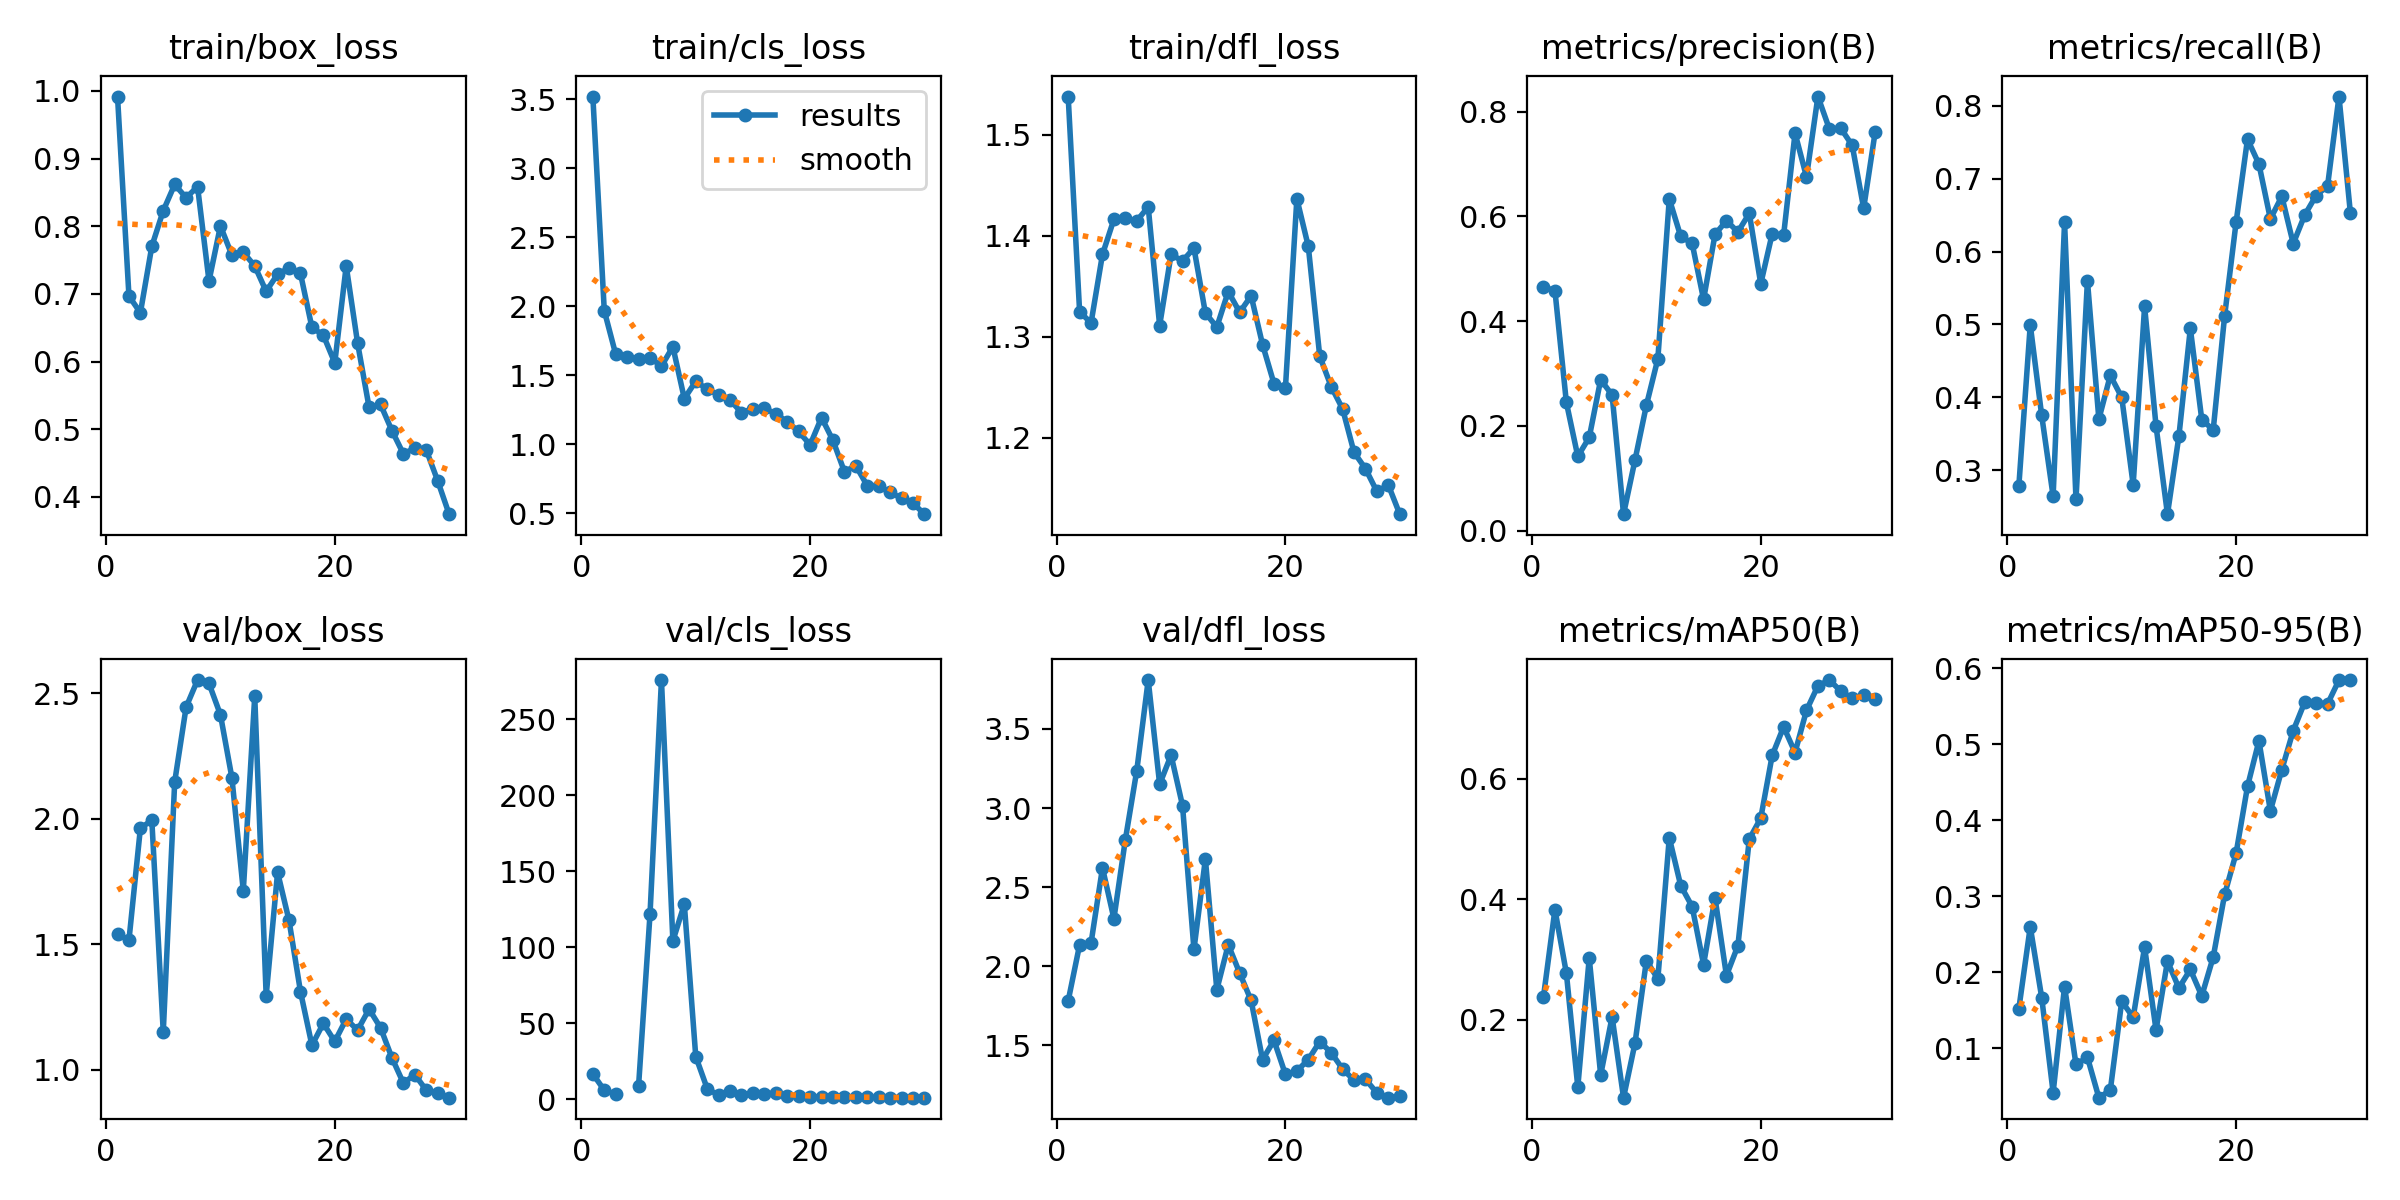

In [ ]:
Image(filename=f'/content/runs/detect/train2/results.png', width=600)

validating the modle using validate dataset

In [ ]:
!yolo task=detect mode=val model='/content/runs/detect/train2/weights/best.pt' data={dataset.location}/data.yaml

Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842655 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/ANIMAL_VID-5/valid/labels.cache... 19 images, 3 backgrounds, 0 corrupt: 100% 19/19 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:04<00:00,  2.01s/it]
                   all         19         20      0.616      0.813       0.74      0.585
               BUFFALO         19          4      0.385          1      0.702      0.589
               CHEETAH         19          2      0.856        0.5      0.501       0.25
              ELEPHANT         19          5      0.551          1      0.881      0.772
                  LION         19          5      0.735      0.563      0.622      0.534
                 TIGER         19          4      0.555          1      0.995      0.779
Speed: 0.3ms preprocess, 40.9ms inference, 0.0ms los

predict the model using test images

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train2/weights/best.pt conf=0.5 source=/content/ANIMAL_VID-5/test/images

Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842655 parameters, 0 gradients, 78.7 GFLOPs

image 1/10 /content/ANIMAL_VID-5/test/images/BUFFALO2_jpg.rf.dd490d6a79d08e62f2b8a6c056e90066.jpg: 640x640 1 BUFFALO, 37.1ms
image 2/10 /content/ANIMAL_VID-5/test/images/BUFFALO_jpg.rf.e9384183d12f90d3421a9930f7b77ac0.jpg: 640x640 1 BUFFALO, 37.2ms
image 3/10 /content/ANIMAL_VID-5/test/images/Kalahari-Lion-Roaring-4K-Conservation-Safari-Experience_mp4-0_jpg.rf.55109241a0476280a4e8f1d8fcaab1fe.jpg: 640x640 1 LION, 37.0ms
image 4/10 /content/ANIMAL_VID-5/test/images/LION_jpg.rf.218a7a124fdab3286ec3186b457f692f.jpg: 640x640 1 LION, 37.1ms
image 5/10 /content/ANIMAL_VID-5/test/images/Recording-19_mp4-3_jpg.rf.72a7647231ef32aaa80f0216f3d2a949.jpg: 640x640 (no detections), 33.6ms
image 6/10 /content/ANIMAL_VID-5/test/images/Recording-20_mp4-1_jpg.rf.6e403be129b585343aa21eb74d705c3d.jpg: 640x640 2 BUFFALOs, 23.9ms
image 7/10 /c

test images with bounding boxes

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg'):
  display(Image(filename=image_path, height=600))
  print("\n")

In [ ]:

%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/
Mounted at /content/gdrive
